### Set Up Birthright

In [1]:
from regency import Regency

Game = Regency('new')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [2]:
from regency import Regency

Game = Regency('new')

domain='Coeranys'
Game.add_regent('EC', 'Eluvie Cariele', Class='Fighter', Alignment='CG', Regency_Bonus=2
                     , Attitude='Peaceful', Lieutenants=['Aedric Bherenstae'])
Game.add_regent('LPA', 'Life and Protection of Avanalae (Medhlorie Haensen)', Archetype='Priest', Regency_Bonus=3)
Game.add_regent('GH', 'Ghorien Hiriele (Highland/Overland Traders)')
Game.add_regent('Sw2', 'Second Swamp Mage', Archetype='Hag')
Game.add_regent('HA', "Haelyn's Aegis (Anita Maricoere)", Archetype='Priest')
Game.add_regent('DW', "Diirk Watersold (Royal Guild of Baruk-Azhir)")
Game.add_regent('TBM', "Three Brother Mages", Archetype='Mage')
Game.add_regent('EL', "Elamien Lamier (Points East Trading Guild)")

Game.add_relationship('LPA', 'EC', Diplomacy=3, Vassalage=1)

p = 'Bogsend'
Game.add_provence(p, domain, 'EC', 1543, 1985, Population=3, Magic=2, Terrain='Swamp')
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'Sw2', 'Source', 2)


p = 'Caudraight'
Game.add_provence(p, domain, 'EC', 1556, 1914, Population=4, Magic=1)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'HA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'GH', 'Guild', 2)

p = 'Deepshadow'
Game.add_provence(p, domain, 'EC', 1562, 1817, Population=3, Magic=2)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 3)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Duornil'
Game.add_provence(p, domain, 'EC', 1606, 1837, Population=2, Magic=3)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 3)
Game.add_holding(p, 'TBM', 'Source', 2)

p = 'Mistil'
Game.add_provence(p, domain, 'EC', 1662, 1966, Population=2, Magic=3)
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Ranien'
Game.add_provence(p, domain, 'EC', 1610, 1921, Population=2, Magic=3)
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Ruorven'
Game.add_provence(p, domain, 'EC', 1610, 2043, Population=4, Magic=1, Terrain='Swamp', Capital=True)
Game.add_holding(p, 'EC', 'Law', 3)
Game.add_holding(p, 'LPA', 'Temple', 3)
Game.add_holding(p, 'HA', 'Temple', 1)
Game.add_holding(p, 'EL', 'Guild', 2)
Game.add_holding(p, 'DW', 'Guild', 2)

Game.add_geo('Deepshadow', 'Duornil', Border=1)
Game.add_geo('Caudraight', 'Duornil', Border=1)
Game.add_geo('Deepshadow', 'Caudraight', Border=1)
Game.add_geo('Caudraight', 'Ranien', Border=1)
Game.add_geo('Caudraight', 'Bogsend', Border=1)
Game.add_geo('Mistil', 'Ranien', Border=1)
Game.add_geo('Mistil', 'Ruorven', Border=1)
Game.add_geo('Bogsend', 'Ruorven', Border=1)
Game.add_geo('Bogsend', 'Ranien', Border=1)
Game.add_geo('Ranien', 'Ruorven', Border=1)
Game.add_geo('Ranien', 'Duornil', Border=1)

domain='Osoerde'

Game.add_geo('Brothendar', 'Algael', Border=1)
Game.add_geo('Brothendar', 'Ghalliere', Border=1)
Game.add_geo('Brothendar', 'Gulfport', Border=1)
Game.add_geo('Moergen', 'Ghalliere', Border=1)
Game.add_geo('Moergen', 'Gulfport', Border=1)
Game.add_geo('Moriel', 'Ghalliere', Border=1)
Game.add_geo('Moriel', 'Gulfport', Border=1)
Game.add_geo('Moriel', 'Brothendar', Border=1)
Game.add_geo('Moriel', 'Moergen', Border=1)
Game.add_geo('Spiritsend', 'Algael', Border=1)
Game.add_geo('Spiritsend', 'Gulfport', Border=1)
Game.add_geo('Spiritsend', 'Brothendar', Border=1)
Game.add_geo('Spiritsend', 'Moriel', Border=1)
Game.add_geo('Sunken Lands', 'Gulfport', Border=1)
Game.add_geo('Sunken Lands', 'Moergen', Border=1)

Game.add_geo('Sunken Lands', 'Bogsend', Border=1)
Game.add_geo('Bogsend', 'Moergen', Border=1)
Game.add_geo('Sunken Lands', 'Ruorven', Border=1)
Game.add_geo('Ruorven', 'Moergen', Border=1)

Game.add_regent('JR', 'Jaison Raenech', Class='Fighter', Level=7, Alignment='LE', Regency_Bonus=3
                     , Attitude='Aggresive', Lieutenants=['Terence Gryphon'])
Game.add_regent('WM', 'Willaim Moergen', Class='Fighter', Level=5, Alignment='CG', Regency_Bonus=3)
Game.add_regent('IHH', 'Impregnable Heart of Haelyn (Hubaere Armeindin)', Archetype='Priest')
Game.add_regent('Sw', 'Swamp Mage', Archetype='Hag')
Game.add_regent('CSH', "Church of Storm's End", Archetype='Priest')
Game.add_regent('TCV', 'One True Church of Vosgaard', Archetype='Priest')

Game.add_relationship('JR', 'WM', Diplomacy=-2)
Game.add_relationship('WM', 'JR', Diplomacy=-3)

p = 'Algael'
Game.add_provence(p, domain, 'JR', 1355, 2226, Population=2, Magic=3, Terrain='Swamp')
Game.add_holding(p, 'JR', 'Law', 2)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw', 'Source', 3)

p = 'Brothendar'
Game.add_provence(p, domain, 'JR', 1377, 2177, Population=3, Magic=2)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 3)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'Sw', 'Source', 2)

p = 'Ghalliere'
Game.add_provence(p, domain, 'JR', 1394, 2110, Population=2, Magic=3)
Game.add_holding(p, 'JR', 'Law', 1)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'GH', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 3)

p = 'Gulfport'
Game.add_provence(p, domain, 'JR', 1515, 2154, Population=3, Magic=2)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 2)
Game.add_holding(p, 'Sw2', 'Source', 2)

p = 'Moergen'
Game.add_provence(p, domain, 'JR', 1471, 2067, Population=2, Magic=3)
Game.add_holding(p, 'WM', 'Law', 2)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 3)

p = 'Moriel'
Game.add_provence(p, domain, 'JR', 1448, 2138, Population=4, Magic=1, Capital=True)
Game.add_holding(p, 'WM', 'Law', 1)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 3)
Game.add_holding(p, 'TCV', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 1)

p = 'Spiritsend'
Game.add_provence(p, domain, 'JR', 1466, 2231, Population=2, Magic=6, Terrain='Swamp')
Game.add_holding(p, 'JR', 'Law', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw', 'Source', 6)

p = 'Sunken Lands'
Game.add_provence(p, domain, 'JR',  1541, 2085, Population=2, Magic=6, Terrain='Swamp')
Game.add_holding(p, 'WM', 'Law', 2)
Game.add_holding(p, 'CSH', 'Temple', 2)
Game.add_holding(p, 'Sw2', 'Source', 6)



# based on family matters
Game.add_troops('JR', 'Moergen', 'Infantry')
Game.add_troops('JR', 'Moergen', 'Infantry')
Game.add_troops('JR', 'Moergen', 'Cavalry')
Game.add_troops('JR', 'Moergen', 'Cavalry')
Game.add_troops('JR', 'Moergen', 'Archers')
Game.add_troops('JR', 'Moergen', 'Pikemen')

Game.add_troops('EC', 'Bogsend', 'Infantry')
Game.add_troops('EC', 'Bogsend', 'Infantry')
Game.add_troops('EC', 'Bogsend', 'Cavalry')
Game.add_troops('EC', 'Bogsend', 'Cavalry')
Game.add_troops('EC', 'Bogsend', 'Archers')
Game.add_troops('EC', 'Bogsend', 'Pikemen')


Game.save_world('Birthright')

Game.Lieutenants

new
new
new
new
new
new
new


,Regent,Lieutenant
0,EC,Aedric Bherenstae
1,JR,Terence Gryphon


In [3]:
Game.Troops

,Regent,Provence,Type,Cost,CR
0,JR,Moergen,Infantry,1,1.0
1,JR,Moergen,Infantry,1,1.0
2,JR,Moergen,Cavalry,2,3.0
3,JR,Moergen,Cavalry,2,3.0
4,JR,Moergen,Archers,1,1.0
5,JR,Moergen,Pikemen,1,1.0
6,EC,Bogsend,Infantry,1,1.0
7,EC,Bogsend,Infantry,1,1.0
8,EC,Bogsend,Cavalry,2,3.0
9,EC,Bogsend,Cavalry,2,3.0


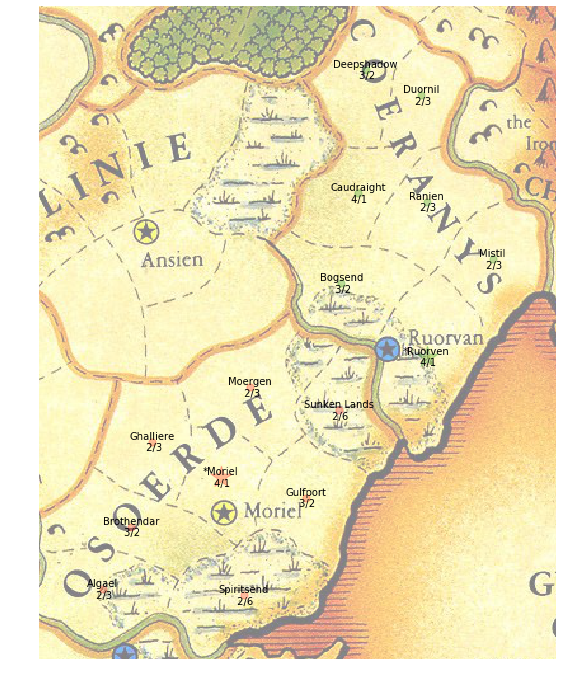

In [5]:
Game.show_map()